In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from collections import OrderedDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from time import time

Helper Function

In [3]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [4]:

import pandas as pd

data = pd.read_csv('reg_features.csv')

data.head()

,Unnamed: 0,OP,N,O,NofRings,Cyanos,logMolWeight,logC,logD-A,logRotbonds,Alpha(esu)
0,0,0.0,6,2,2,0,2.550447,1.113943,1.322219,0.90309,1.920000e-30
1,1,0.0,1,1,4,0,2.496088,1.342423,1.342423,0.69897,2.270000e-30
2,2,0.0,1,1,3,0,2.407729,1.176091,1.204120,0.00000,1.630000e-30
3,3,0.0,1,1,4,0,2.393208,1.230449,1.230449,0.00000,1.690000e-30
4,4,0.0,2,1,4,0,2.394940,1.204120,1.230449,0.00000,1.760000e-30


In [5]:

duplicate= data[data.duplicated()]
print(duplicate)



X = data[['N','O','NofRings','Cyanos','logMolWeight',
          'logC','logD-A','logRotbonds',
          'Alpha(esu)']]
X.head()

Empty DataFrame
Columns: [Unnamed: 0, OP, N, O, NofRings, Cyanos, logMolWeight, logC, logD-A, logRotbonds, Alpha(esu)]
Index: []


,N,O,NofRings,Cyanos,logMolWeight,logC,logD-A,logRotbonds,Alpha(esu)
0,6,2,2,0,2.550447,1.113943,1.322219,0.90309,1.920000e-30
1,1,1,4,0,2.496088,1.342423,1.342423,0.69897,2.270000e-30
2,1,1,3,0,2.407729,1.176091,1.204120,0.00000,1.630000e-30
3,1,1,4,0,2.393208,1.230449,1.230449,0.00000,1.690000e-30
4,2,1,4,0,2.394940,1.204120,1.230449,0.00000,1.760000e-30


In [6]:
y = data[['OP']]
# y = Y
# y = Y.Packing
# y = y.replace(-1,0)

print("values", y.value_counts(), '\n')

values OP      
0.000000    39011
1.000000      376
0.000061        3
0.000014        3
0.000018        3
            ...  
0.047362        1
0.047338        1
0.047295        1
0.047273        1
0.171585        1
Length: 8303, dtype: int64 



In [7]:
# Scale data (0-1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X))
X.columns = ['N','O','NofRings','Cyanos','logMolWeight',
          'logC','logD-A','logRotbonds',
          'Alpha(esu)']
X.head()


# ## Split the Data into Training and Test Sets


# Train/ Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)
X_train


,N,O,NofRings,Cyanos,logMolWeight,logC,logD-A,logRotbonds,Alpha(esu)
1968,-1.170936,1.642558,-0.314405,-0.218561,0.619002,0.115245,0.802581,0.702768,-0.246920
31747,0.058775,-1.227401,-0.729242,-0.218561,-0.620059,-0.817410,-0.487431,-0.644351,-0.568328
32036,0.058775,-1.227401,0.515268,-0.218561,0.243604,0.222251,0.441202,-0.644351,0.347199
27896,0.058775,-0.079418,-0.314405,-0.218561,-0.461368,-0.239334,0.019332,-0.249234,-0.558589
30739,-1.170936,1.068566,1.759779,-0.218561,0.620028,0.776975,0.965564,-0.249234,0.259542
...,...,...,...,...,...,...,...,...,...
11284,0.673630,-1.227401,0.515268,-0.218561,0.467812,0.776975,0.885387,0.057242,0.551731
44732,-0.556081,-0.079418,-0.314405,-0.218561,-0.797545,-0.817410,-0.631776,0.057242,-0.928695
38158,2.518197,-1.227401,2.589453,-0.218561,0.599356,2.452078,0.965564,0.702768,0.308240
860,-0.556081,1.642558,-0.729242,-0.218561,0.006676,-0.817410,0.019332,0.307652,-0.568328


In [8]:
# ## Import Regressers
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:

dumr = DummyRegressor()
rr  = Ridge()
abr = AdaBoostRegressor()
gbr= GradientBoostingRegressor()
rfr= RandomForestRegressor()
etr = ExtraTreesRegressor()
svr = SVR()
lsvr = LinearSVR()
knr = KNeighborsRegressor()

model_list = [rr, abr, gbr, rfr, etr, svr, lsvr, knr]

for model in model_list:
    print("Training ",model)
    model.fit(X_train,y_train.values.ravel())
    print(model,"Trained")
    

Training  Ridge()
Ridge() Trained
Training  AdaBoostRegressor()
AdaBoostRegressor() Trained
Training  GradientBoostingRegressor()
GradientBoostingRegressor() Trained
Training  RandomForestRegressor()
RandomForestRegressor() Trained
Training  ExtraTreesRegressor()
ExtraTreesRegressor() Trained
Training  SVR()
SVR() Trained
Training  LinearSVR()
LinearSVR() Trained
Training  KNeighborsRegressor()
KNeighborsRegressor() Trained


c:\Users\hasan\miniconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


In [41]:
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
})

In [42]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_test, y_test)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor


c:\Users\hasan\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now fitting and evaluating model gbr: GradientBoostingRegressor


c:\Users\hasan\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now fitting and evaluating model rfr: RandomForestRegressor


C:\Users\hasan\AppData\Local\Temp\ipykernel_15272\2440609463.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Now fitting and evaluating model etr: ExtraTreesRegressor


C:\Users\hasan\AppData\Local\Temp\ipykernel_15272\2440609463.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Now fitting and evaluating model svr: SVR


c:\Users\hasan\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now fitting and evaluating model lsvr: LinearSVR


c:\Users\hasan\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hasan\miniconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 9 models, total time: 289.55 s


In [43]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",1.998301,-0.095887,0.061547,0.207804,-0.092102,0.059038,0.203030
1,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.039510,0.287727,0.078410,0.167531,-0.069979,0.095555,0.200963
2,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",5.403487,0.992815,0.000826,0.016827,-0.061432,0.103267,0.200159
3,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",185.948437,0.004535,0.132960,0.198055,-0.013458,0.132062,0.195583
4,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.002004,0.000000,0.106580,0.198505,-0.000167,0.104722,0.194296
5,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",40.517020,0.860274,0.037888,0.074201,0.011419,0.101026,0.193168
6,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.004920,0.028164,0.103958,0.195690,0.024914,0.102311,0.191845
7,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.503433,0.049081,0.101585,0.193572,0.030822,0.100336,0.191263
8,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",8.342663,0.111782,0.097345,0.187082,0.066641,0.097415,0.187695


In [30]:
# import matplotlib.pyplot as plt
import numpy as np


def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

ValueError: Polynomial must be 1d only.

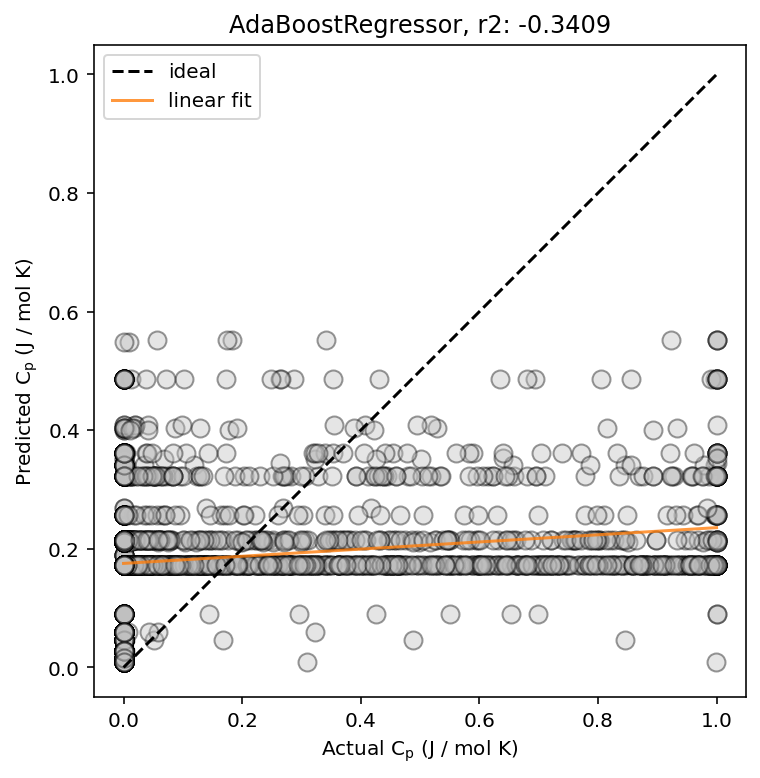

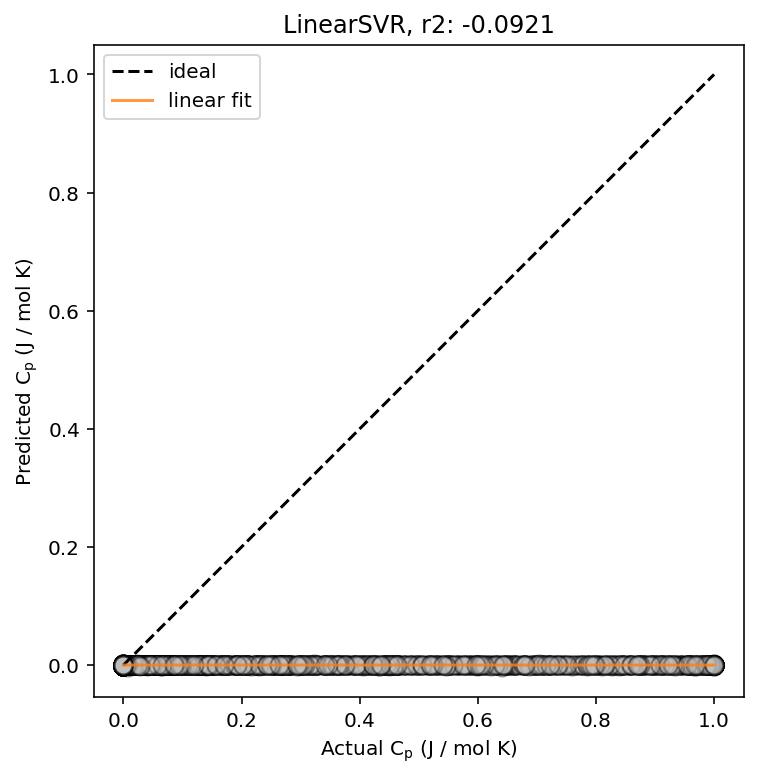

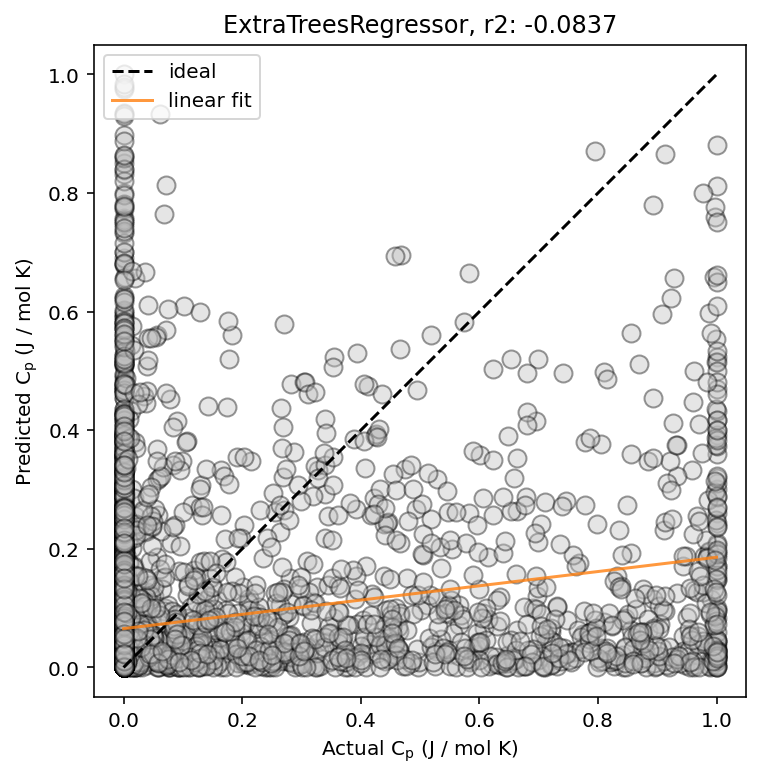

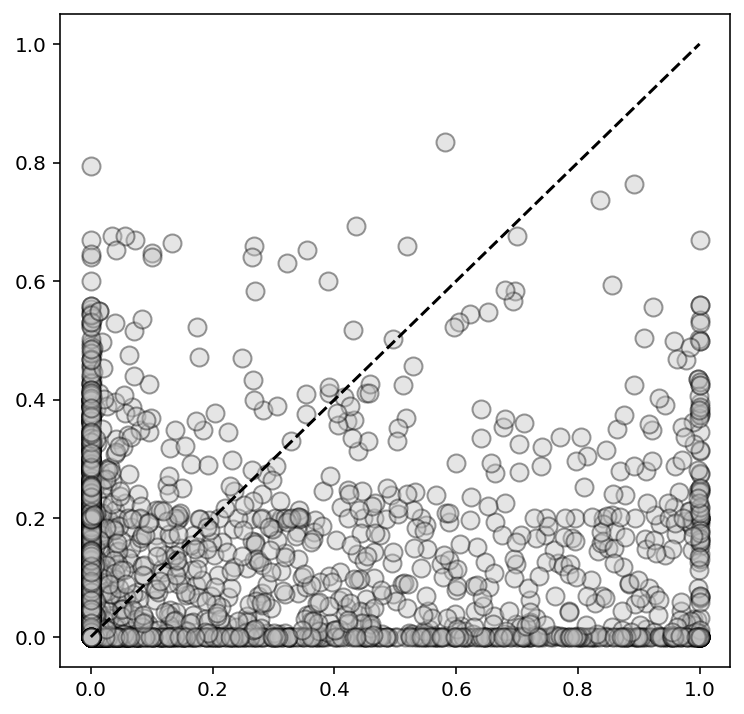

In [32]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_test.values.ravel()
    y_pred_val = model.predict(X_test)

    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='$\mathrm{C}_\mathrm{p}$ (J / mol K)')

In [55]:
dumr = DummyRegressor()
rr  = Ridge()
abr = AdaBoostRegressor()
gbr= GradientBoostingRegressor()
rfr= RandomForestRegressor()
etr = ExtraTreesRegressor()
svr = SVR()
lsvr = LinearSVR()
knr = KNeighborsRegressor()

model_list = [rr, abr, gbr, rfr, etr, svr, lsvr, knr]

for model in model_list:
    print("Training ",model)
    model.fit(X_train,y_train.values.ravel())
    print(model,"Trained")

Training  Ridge()
Ridge() Trained
Training  AdaBoostRegressor()
AdaBoostRegressor() Trained
Training  GradientBoostingRegressor()
GradientBoostingRegressor() Trained
Training  RandomForestRegressor()
RandomForestRegressor() Trained
Training  ExtraTreesRegressor()
ExtraTreesRegressor() Trained
Training  SVR()
SVR() Trained
Training  LinearSVR()
LinearSVR() Trained
Training  KNeighborsRegressor()
KNeighborsRegressor() Trained


c:\Users\hasan\miniconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
## Testing the trained model on the test dataset
def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val
    
y_act = y_test
for model in model_list:
    r2, mae, rmse = evaluate_model(model, X_test, y_test)
    print('model name:', model, f'r2: {r2:0.4f}')
    print(f'mae: {mae:0.4f}')
    print(f'rmse: {rmse:0.4f}')
    # y_pred_test = model.predict(X_test)
    # plot = plot_pred_act(y_act, y_pred_test, model, reg_line=True, label='')

model name: Ridge() r2: 0.0352
mae: 0.1010
rmse: 0.1903
model name: AdaBoostRegressor() r2: -0.3800
mae: 0.1961
rmse: 0.2276
model name: GradientBoostingRegressor() r2: 0.0741
mae: 0.0960
rmse: 0.1864
model name: RandomForestRegressor() r2: -0.0029
mae: 0.1050
rmse: 0.1940
model name: ExtraTreesRegressor() r2: -0.0768
mae: 0.1033
rmse: 0.2011
model name: SVR() r2: 0.0020
mae: 0.1303
rmse: 0.1936
model name: LinearSVR() r2: -0.0912
mae: 0.0586
rmse: 0.2024
model name: KNeighborsRegressor() r2: -0.0844
mae: 0.0948
rmse: 0.2018


In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# df1 = pd.read_csv('f_e_half/X_test_half.csv')
# df2 = pd.read_csv('f_e_half/y_test_half.csv')

# X = df1.values#.tolist()
# y = df2['classes'].values#.tolist()

#print(type(y))
#print(y)
#print(y)

gbr= GradientBoostingRegressor()

params = {
    "max_depth": randint(4, 12), # default 3
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "n_estimators": randint(120, 170),
    "min_samples_split":randint(2, 5),
    
}

search = RandomizedSearchCV(gbr, param_distributions=params, random_state=42, n_iter=10, cv=8, verbose=1, n_jobs=7, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


c:\Users\hasan\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model with rank: 1
Mean validation score: 0.082 (std: 0.019)
Parameters: {'learning_rate': 0.05999247474540086, 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 155}

